In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

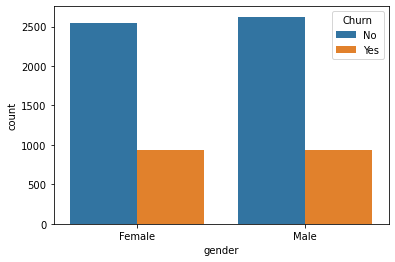

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = df['gender'], data = df, hue = df['Churn'] )

Through countplot, we can see that that for both classes of churn, gender is equally distributed

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

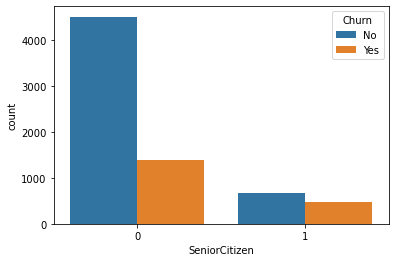

In [10]:
sns.countplot(x = df['SeniorCitizen'], data = df, hue = df['Churn'] )

We can see that there is very less population of senior citizen in the dataset

<AxesSubplot:xlabel='Partner', ylabel='count'>

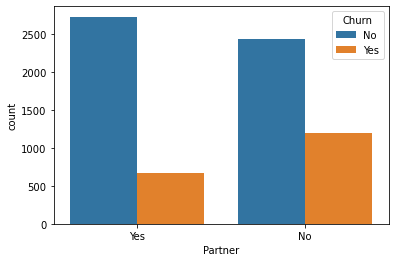

In [11]:
sns.countplot(x = df['Partner'], data = df, hue = df['Churn'] )

we can see that, customer with partner are less likely to churn out

<AxesSubplot:xlabel='Dependents', ylabel='count'>

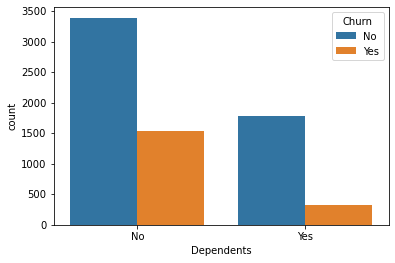

In [12]:
sns.countplot(x = df['Dependents'], data = df, hue = df['Churn'] )

<AxesSubplot:xlabel='Contract', ylabel='count'>

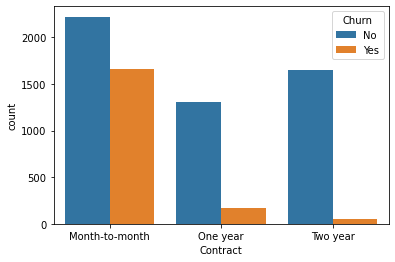

In [13]:
sns.countplot(x = df['Contract'], data = df, hue = df['Churn'] )

Customer with greater time period contract are least to churn out

<Figure size 1800x1440 with 0 Axes>

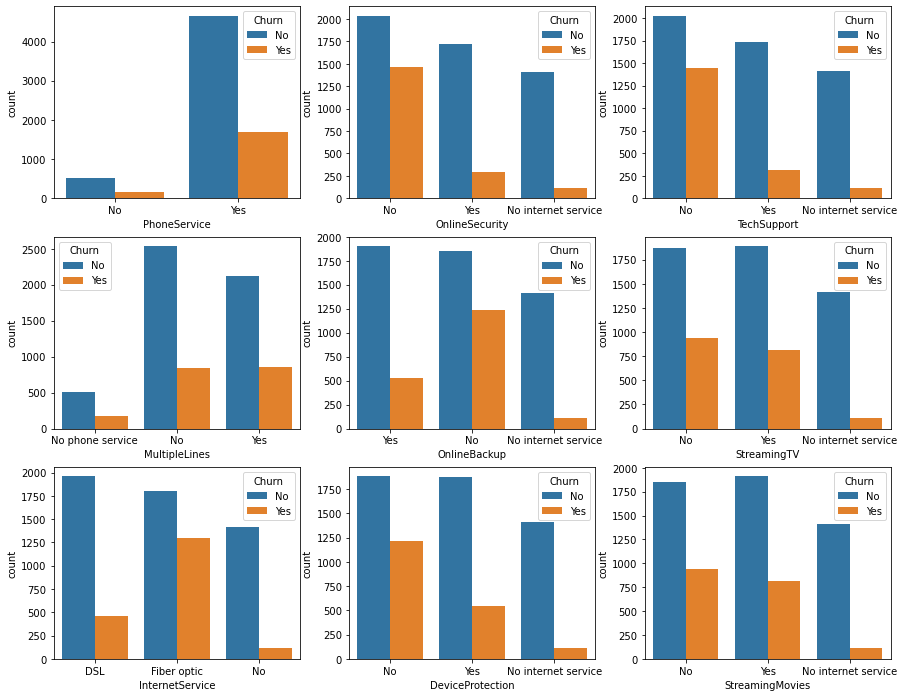

In [47]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup','DeviceProtection',
        'TechSupport','StreamingTV','StreamingMovies']

plt.figure( figsize = (25,20) )

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, column in enumerate(cols):
    if i < 3:
        sns.countplot(x = df[column], data = df, hue = df['Churn'] , ax=axes[i,0])
        
    elif i >=3 and i < 6:
        sns.countplot(x = df[column], data = df, hue = df['Churn'] , ax=axes[i-3,1])
        
    elif i < 9:
        sns.countplot(x = df[column], data = df, hue = df['Churn'] , ax=axes[i-6,2])
    ax.set_title(item)


 Below are the observations :-
 
 1) Customer having OnlineSecurity are less likely to churn out
 
 2) Customer having OnlineBackup are less likely to churn out
 
 3) Customer having DSL as InternetService are less likely to churn out in comparison with Fibre Optic as the InternetService
 
 4) Customer having DeviceProtection are less likely to churn out

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

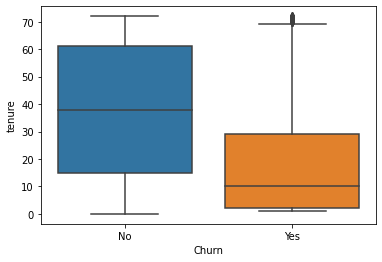

In [49]:
sns.boxplot(x = df['Churn'], y = df['tenure'] )

Customer having lesser tenure are churning out easily

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'] )
df['Partner'] = le.fit_transform(df['Partner'] )
df['Dependents'] = le.fit_transform(df['Dependents'] )
df['PhoneService'] = le.fit_transform(df['PhoneService'] )
df['MultipleLines'] = le.fit_transform(df['MultipleLines'] )
df['InternetService'] = le.fit_transform(df['InternetService'] )
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'] )
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'] )
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'] )
df['TechSupport'] = le.fit_transform(df['TechSupport'] )
df['StreamingTV'] = le.fit_transform(df['StreamingTV'] )
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'] )
df['Contract'] = le.fit_transform(df['Contract'] )
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'] )
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'] )
df['Churn'] = le.fit_transform(df['Churn'] )

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


Converting all categorical columns to numerical values

In [52]:
df.drop(['customerID'], axis = 1, inplace = True )

Dropping Customerid column as each column has unique value and this wont help much in predicting the outcome.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [60]:
df['TotalCharges'] = pd.to_numeric( df['TotalCharges'], errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Converting Total Charges to a numerical data type.

In [62]:
df.dropna(inplace = True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dropping 11 rows as these have null TotalCharges values

# Model Selection

In [63]:
x = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [64]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [65]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [67]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = mms.fit_transform(x)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 42, test_size = 0.2 )

## 1. LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

print('Classification Report with LogisticRegression :', "\n",  classification_report(y_test,lr_predict))
print('Accuracy with LogisticRegression : ', accuracy_score(lr_predict,y_test) , "\n")
print('Confusion Matrix with LogisticRegression : ', "\n", confusion_matrix(lr_predict,y_test), "\n")
print('roc_auc_score with LogisticRegression: ', roc_auc_score(lr_predict,y_test))

Classification Report with LogisticRegression : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy with LogisticRegression :  0.7860696517412935 

Confusion Matrix with LogisticRegression :  
 [[921 189]
 [112 185]] 

roc_auc_score with LogisticRegression:  0.7263126763126764


## 2. RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, max_features=10, n_estimators=25)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('Classification Report with RandomForestClassifier :', "\n",  classification_report(y_test,rf_pred))
print('Accuracy with RandomForestClassifier : ', accuracy_score(rf_pred,y_test) , "\n")
print('Confusion Matrix with RandomForestClassifier : ', "\n", confusion_matrix(rf_pred,y_test), "\n")
print('roc_auc_score with RandomForestClassifier: ', roc_auc_score(rf_pred,y_test))

Classification Report with RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy with RandomForestClassifier :  0.7931769722814499 

Confusion Matrix with RandomForestClassifier :  
 [[937 195]
 [ 96 179]] 

roc_auc_score with RandomForestClassifier:  0.7393238034050754


## 3. DecisionTreeClassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,dtc_pred))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(dtc_pred,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(dtc_pred,y_test), "\n")
print('roc_auc_score with DecisionTreeClassifier: ', roc_auc_score(dtc_pred,y_test))

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.79      0.93      0.86      1033
           1       0.64      0.33      0.44       374

    accuracy                           0.77      1407
   macro avg       0.72      0.63      0.65      1407
weighted avg       0.75      0.77      0.75      1407

Accuracy with DecisionTreeClassifier :  0.7725657427149965 

Confusion Matrix with DecisionTreeClassifier :  
 [[962 249]
 [ 71 125]] 

roc_auc_score with DecisionTreeClassifier:  0.716069953993158


## 4. XGBClassifier

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print('Classification Report with XGBClassifier :', "\n",  classification_report(y_test,xgb_pred))
print('Accuracy with XGBClassifier : ', accuracy_score(xgb_pred,y_test) , "\n")
print('Confusion Matrix with XGBClassifier : ', "\n", confusion_matrix(xgb_pred,y_test), "\n")
print('roc_auc_score with XGBClassifier: ', roc_auc_score(xgb_pred,y_test))

[12:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report with XGBClassifier : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.58      0.48      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Accuracy with XGBClassifier :  0.7697228144989339 

Confusion Matrix with XGBClassifier :  
 [[902 193]
 [131 181]] 

roc_auc_score with XGBClassifier:  0.7019362486828241


## 5. SVC

In [73]:
from sklearn.svm import SVC

svm = SVC(kernel='linear') 
svm.fit(x_train,y_train)

svm_pred = svm.predict(x_test)


print('Classification Report with SVC :', "\n",  classification_report(y_test,svm_pred))
print('Accuracy with SVC : ', accuracy_score(svm_pred,y_test) , "\n")
print('Confusion Matrix with SVC : ', "\n", confusion_matrix(svm_pred,y_test), "\n")
print('roc_auc_score with SVC: ', roc_auc_score(svm_pred,y_test))

Classification Report with SVC : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy with SVC :  0.7917555081734187 

Confusion Matrix with SVC :  
 [[923 183]
 [110 191]] 

roc_auc_score with SVC:  0.7345451869296438


## 6. AdaBoostClassifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)

adaboost_pred = adaboost.predict(x_test)

print('Classification Report with AdaBoostClassifier :', "\n",  classification_report(y_test,adaboost_pred))
print('Accuracy with AdaBoostClassifier : ', accuracy_score(adaboost_pred,y_test) , "\n")
print('Confusion Matrix with AdaBoostClassifier : ', "\n", confusion_matrix(adaboost_pred,y_test), "\n")
print('roc_auc_score with AdaBoostClassifier: ', roc_auc_score(adaboost_pred,y_test))

Classification Report with AdaBoostClassifier : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Accuracy with AdaBoostClassifier :  0.783226723525231 

Confusion Matrix with AdaBoostClassifier :  
 [[921 193]
 [112 181]] 

roc_auc_score with AdaBoostClassifier:  0.7222489445530359


In [77]:
import pickle
filename = 'Telecom_customer_churn.pkl'
pickle.dump( rf, open(filename, 'wb' ))

Saving the model with RandomForestClassifier as the accuracy is 80 % the greatest among all the other models

In [78]:
filename = 'Telecom_customer_churn.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7931769722814499
